# 0. Necessary imports

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

print(f'Pytorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")')

Pytorch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121")


# 1. Getting a Dataset

In [3]:
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:11<00:00, 2366373.38it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 166286.15it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3067203.47it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4202467.30it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.data)

(60000, 60000, 10000, 10000)

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 1.2 Visualizing the dataset

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

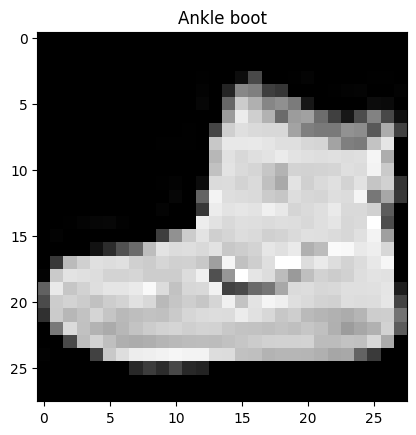

In [8]:
image, label=train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

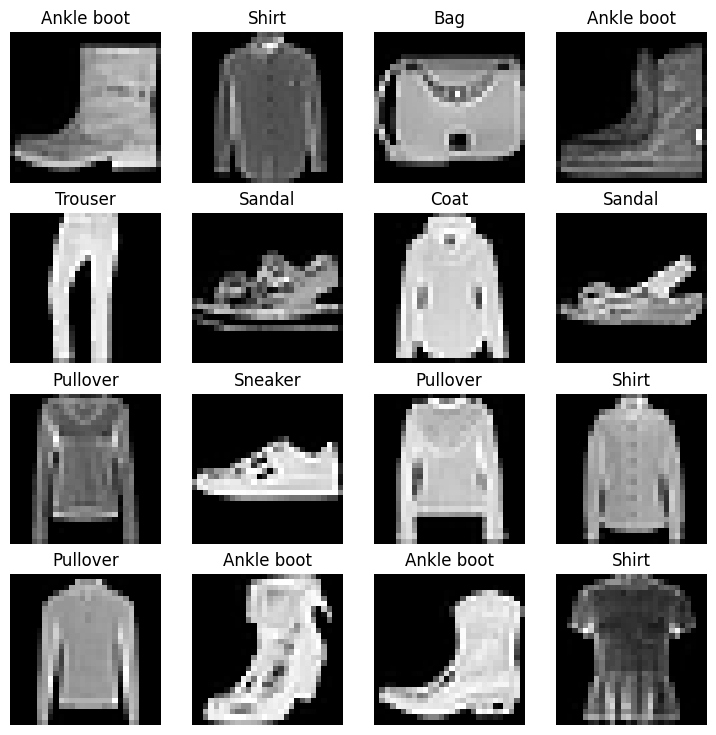

In [9]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols=4,4

for i in range(1,rows*cols + 1):
  random_idx=torch.randint(0,len(train_data), size=[1]).item()
  image, label=train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False);

# 2. prepare DataLoader

In [10]:
BATCH_SIZE=32

train_dataloader=DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader=DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b0221af4ee0>, <torch.utils.data.dataloader.DataLoader object at 0x7b0221af7940>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
train_batch_features, train_batch_labels=next(iter(train_dataloader))
train_batch_features.shape, train_batch_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


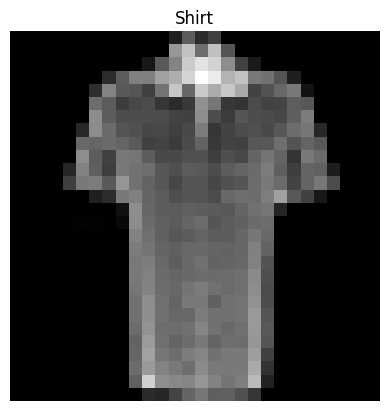

In [12]:
torch.manual_seed(42)
random_idx=torch.randint(0, len(train_batch_features), size=[1]).item()
image, label=train_batch_features[random_idx],train_batch_labels[random_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off');
print(f"Image size: {image.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. building a model

In [13]:
device='cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [14]:
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int,hidden_units:int, output_shape:int ):
    super().__init__()
    self.block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.block_1(x)
    x=self.block_2(x)
    x=self.classifier(x)
    return x

torch.manual_seed(42)
model=FashionMNISTModel(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)
model

FashionMNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 4. loss function and optimizer

In [15]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(), lr=0.01)

# 5. training and testing loops

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



from helper_functions import accuracy_fn

In [17]:
from tqdm.auto import tqdm

In [18]:
def print_train_time(start:float, end:float, device:torch.device=None ):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [19]:
def train_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, optimizer:torch.optim.Optimizer, accuracy_fn, device:torch.device=device):
  train_loss, train_acc=0,0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X,y=X.to(device), y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred, y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss/=len(data_loader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



In [20]:
def test_step(data_loader:torch.utils.data.DataLoader, model:torch.nn.Module, loss_fn:torch.nn.Module, accuracy_fn, device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_acc/= len(data_loader)
    test_loss/= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [21]:
from timeit import default_timer as timer
train_time_start_model = timer()

epochs=10

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n')

  train_step(data_loader=train_dataloader,
             model=model,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(data_loader=test_dataloader,
            model=model,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )
train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

Train loss: 1.03543 | Train accuracy: 62.32%
Test loss: 0.64530 | Test accuracy: 77.01%

Epoch: 1

Train loss: 0.55180 | Train accuracy: 79.97%
Test loss: 0.52520 | Test accuracy: 80.58%

Epoch: 2

Train loss: 0.45569 | Train accuracy: 83.55%
Test loss: 0.45401 | Test accuracy: 83.90%

Epoch: 3

Train loss: 0.41206 | Train accuracy: 85.15%
Test loss: 0.40790 | Test accuracy: 85.72%

Epoch: 4

Train loss: 0.38615 | Train accuracy: 86.13%
Test loss: 0.39550 | Test accuracy: 86.25%

Epoch: 5

Train loss: 0.36669 | Train accuracy: 86.83%
Test loss: 0.39120 | Test accuracy: 85.92%

Epoch: 6

Train loss: 0.35009 | Train accuracy: 87.52%
Test loss: 0.38320 | Test accuracy: 86.31%

Epoch: 7

Train loss: 0.33751 | Train accuracy: 87.91%
Test loss: 0.36790 | Test accuracy: 87.10%

Epoch: 8

Train loss: 0.32720 | Train accuracy: 88.28%
Test loss: 0.34562 | Test accuracy: 87.57%

Epoch: 9

Train loss: 0.31789 | Train accuracy: 88.67%
Test loss: 0.34835 | Test accuracy: 87.77%

Train time

# making predictions with model on test data

In [22]:
def make_predictions(model:torch.nn.Module, data:list, device:torch.device=device):
  pred_probs=[]
  model.eval()

  with  torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample, dim=0).to(device)
      pred_logit=model(sample)

      pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)


In [23]:
import random
random.seed(42)
test_sample=[]
test_label=[]
for sample, label in random.sample(list(test_data), k=12):
  test_sample.append(sample)
  test_label.append(label)

print(f"Test sample image shape: {test_sample[0].shape}\nTest sample label: {test_label[0]} ({class_names[test_label[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [24]:
pred_probs=make_predictions(model=model, data=test_sample)

pred_probs[:2]

tensor([[4.1418e-08, 8.6466e-12, 6.6904e-10, 1.4366e-10, 9.2365e-11, 9.9820e-01,
         1.1149e-07, 7.8085e-07, 1.6219e-06, 1.8022e-03],
        [6.0749e-03, 9.3678e-01, 1.0472e-03, 1.7527e-02, 2.6895e-02, 2.4800e-05,
         1.1393e-02, 3.0188e-06, 2.5970e-04, 4.8269e-07]])

In [25]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2])

In [26]:
test_label, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2],
 tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2]))

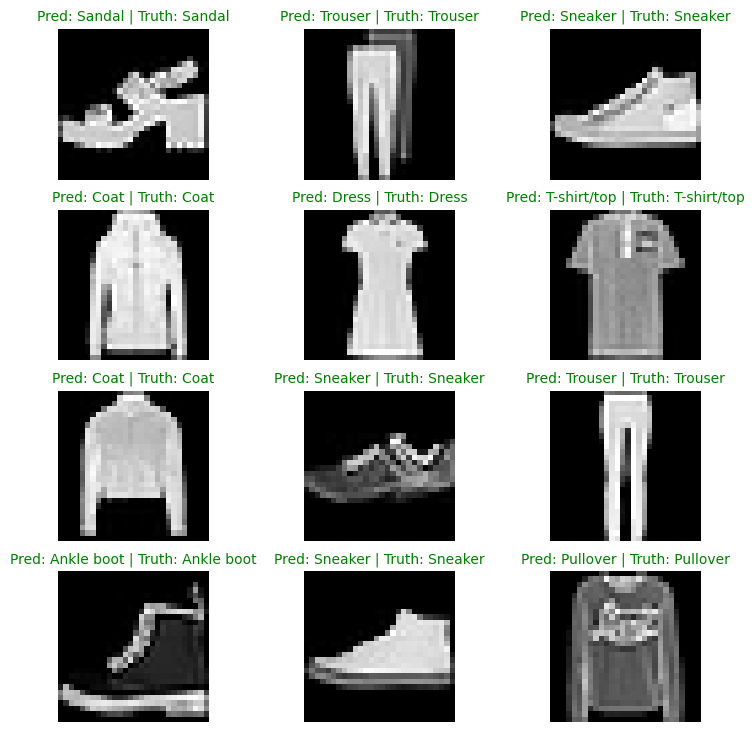

In [27]:
plt.figure(figsize=(9,9))
nrows=4
ncols=3
for i, sample in enumerate(test_sample):
  plt.subplot(nrows, ncols, 1+i)
  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label=class_names[pred_classes[i]]

  truth_label=class_names[test_label[i]]

  title_txt= f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_txt, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_txt, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


# confusion matrix

In [29]:
from tqdm.auto import tqdm
y_preds=[]
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= 'Making predictions'):
    X, y = X.to(device), y.to(device)
    y_logit=model(X)
    y_pred=torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor= torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [30]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 61.2 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [31]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


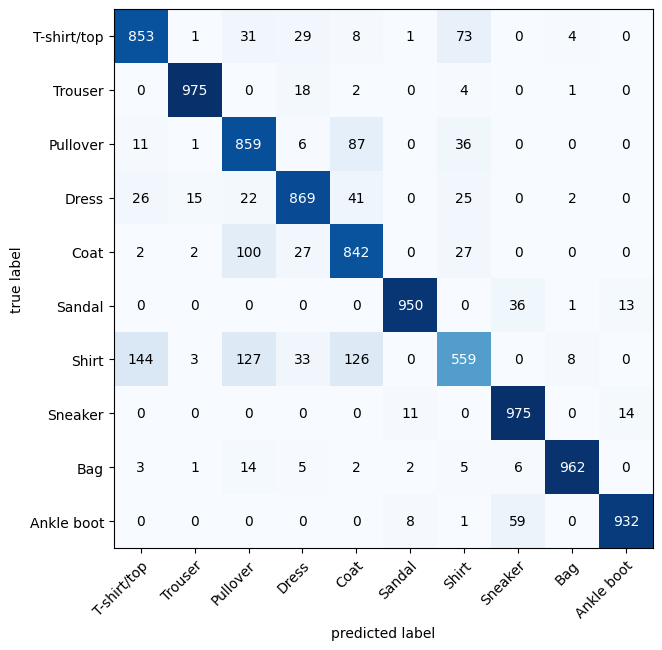

In [32]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

# saving the model

In [34]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model.pth
